<a href="https://colab.research.google.com/github/data-enhanced/Jupyter_Notebooks/blob/main/01_Titanic_EDA_%26_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic EDA & Cleaning
**Example by David Cochran**

See [the Titanic Kaggle competition](https://www.kaggle.com/c/titanic/overview).

This data set contains the following fields:
- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Install and import Libraries

In [ ]:
!pip install dataprep

In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing
%matplotlib inline

NumExpr defaulting to 2 threads.


## Read in Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# List files in the data folder
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Predictive Analytics/Titanic Project/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Predictive Analytics/Titanic Project/data/titanic.csv


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Predictive Analytics/Titanic Project/data/titanic.csv')
df.sample(10) # View a random sample

PassengerId  Survived  Pclass  ...      Fare    Cabin  Embarked
172          173         1       3  ...   11.1333      NaN         S
511          512         0       3  ...    8.0500      NaN         S
594          595         0       2  ...   26.0000      NaN         S
544          545         0       1  ...  106.4250      C86         C
283          284         1       3  ...    8.0500      NaN         S
336          337         0       1  ...   66.6000       C2         S
789          790         0       1  ...   79.2000  B82 B84         C
625          626         0       1  ...   32.3208      D50         S
415          416         0       3  ...    8.0500      NaN         S
506          507         1       2  ...   26.0000      NaN         S

[10 rows x 12 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



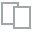
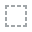
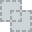
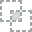
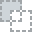
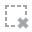
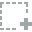
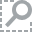
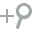
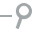
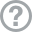
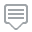
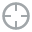
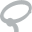
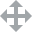
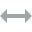
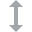
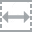
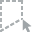
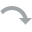
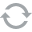
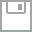
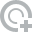
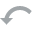
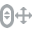
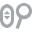
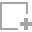
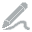
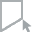
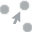
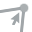
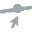

In [7]:
plot(df)

# Drop Irrelevant Columns
These columns are not relevant to analysis:
- Name
- Ticket

We will keep `PassengerId` for checking our results when done.

In [8]:
df.drop(axis=1, columns=['Name','Ticket'], inplace=True)
df.sample(5)

PassengerId  Survived  Pclass     Sex  ...  Parch      Fare  Cabin  Embarked
148          149         0       2    male  ...      2   26.0000     F2         S
651          652         1       2  female  ...      1   23.0000    NaN         S
511          512         0       3    male  ...      0    8.0500    NaN         S
318          319         1       1  female  ...      2  164.8667     C7         S
226          227         1       2    male  ...      0   10.5000    NaN         S

[5 rows x 10 columns]

# Set Data Types

**These should be categorical:**
- Survived
- Pclass
- Sex
- Embarked

_**Age** must remain float, since there are nulls._

In [9]:
for col in ['Survived','Pclass','Sex','Embarked']:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 45.8+ KB



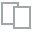
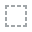
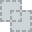
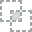
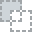
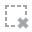
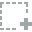
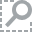
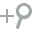
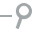
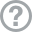
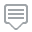
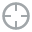
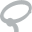
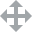
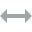
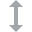
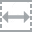
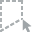
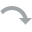
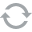
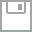
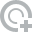
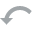
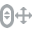
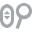
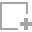
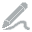
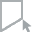
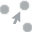
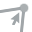
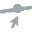

In [10]:
plot(df)

# Address Null Values


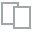
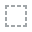
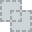
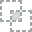
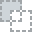
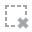
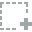
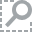
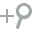
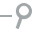
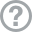
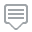
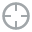
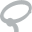
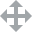
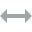
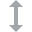
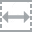
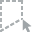
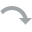
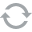
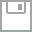
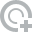
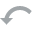
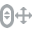
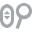
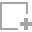
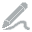
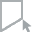
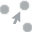
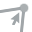
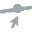

In [11]:
plot_missing(df)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explore null values for Age
Using dataprep plot_missing https://docs.dataprep.ai/user_guide/eda/plot_missing.html


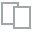
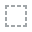
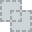
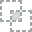
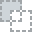
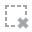
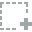
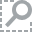
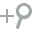
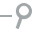
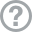
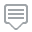
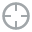
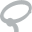
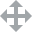
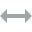
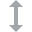
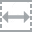
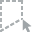
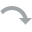
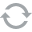
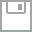
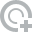
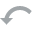
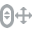
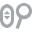
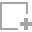
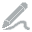
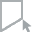
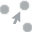
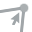
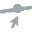

In [13]:
plot_missing(df, 'Age')

**Is there a pattern among the 177 passengers with no Age listed?**

In [14]:
# Get means for continuous columns when grouped by age=null
df.groupby(df['Age'].isnull()).mean().apply(lambda s: s.apply('{:,.3f}'.format))

PassengerId     Age  SibSp  Parch    Fare
Age                                            
False     448.583  29.699  0.513  0.431  34.695
True      435.582     nan  0.565  0.181  22.159

Interpretation: On average, the 177 with no age: 
- tended to be in third class
- were slightly more likely to have a sibling or spouse on board
- were less likely to have a parent or child on board
- paid a lower fare

This does not necessarily raise red flags for analysis.

### Explore null values for Cabin

In [15]:
print(df['Cabin'].isnull().sum())
print('/')
print(len(df.index))
print('=')
print(df['Cabin'].isnull().sum() / len(df.index))

687
/
891
=
0.7710437710437711



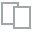
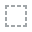
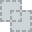
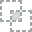
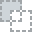
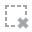
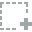
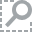
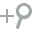
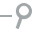
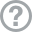
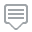
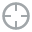
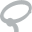
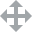
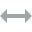
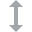
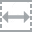
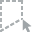
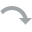
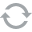
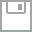
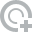
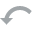
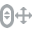
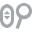
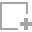
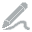
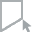
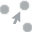
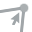
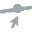

In [16]:
plot_missing(df, 'Cabin')

**Interpretation**: Null values for Cabin have a strong correlation with:
- lower survival rate
- passenger class 2 or 3 -- most Pclass 1 had a cabin indicated

_**This variable will be more meaningful as an indicator of cabin or no-cabin.**_

### Create a binary indicator for cabin yes or no

using np.where method https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [17]:
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)
df.head(10)

PassengerId Survived Pclass     Sex  ...     Fare  Cabin  Embarked  Cabin_ind
0            1        0      3    male  ...   7.2500    NaN         S          0
1            2        1      1  female  ...  71.2833    C85         C          1
2            3        1      3  female  ...   7.9250    NaN         S          0
3            4        1      1  female  ...  53.1000   C123         S          1
4            5        0      3    male  ...   8.0500    NaN         S          0
5            6        0      3    male  ...   8.4583    NaN         Q          0
6            7        0      1    male  ...  51.8625    E46         S          1
7            8        0      3    male  ...  21.0750    NaN         S          0
8            9        1      3  female  ...  11.1333    NaN         S          0
9           10        1      2  female  ...  30.0708    NaN         C          0

[10 rows x 11 columns]

In [18]:
# Convert Cabin_ind to categorical
df['Cabin_ind'] = df['Cabin_ind'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     889 non-null    category
 10  Cabin_ind    891 non-null    category
dtypes: category(5), float64(2), int64(3), object(1)
memory usage: 46.7+ KB


In [19]:
df.drop(axis=1, columns=['Cabin'], inplace=True)
df.sample(10)

PassengerId Survived Pclass     Sex  ...  Parch     Fare  Embarked  Cabin_ind
782          783        0      1    male  ...      0  30.0000         S          1
65            66        1      3    male  ...      1  15.2458         C          0
264          265        0      3  female  ...      0   7.7500         Q          0
571          572        1      1  female  ...      0  51.4792         S          1
85            86        1      3  female  ...      0  15.8500         S          0
528          529        0      3    male  ...      0   7.9250         S          0
818          819        0      3    male  ...      0   6.4500         S          0
582          583        0      2    male  ...      0  26.0000         S          0
518          519        1      2  female  ...      0  26.0000         S          0
625          626        0      1    male  ...      0  32.3208         S          1

[10 rows x 10 columns]

# Create Variables for Continuous and Categorical Columns

We'll use `select_dtypes` to select and list columns by datatype

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html


In [20]:
# List numeric / continuous columns
list(df.select_dtypes(include='number').columns)

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

In [21]:
# Create and test the columns list
continuous = list(df.select_dtypes(include='number').columns)
df[continuous].sample(5)

PassengerId   Age  SibSp  Parch     Fare
104          105  37.0      2      0   7.9250
520          521  30.0      0      0  93.5000
202          203  34.0      0      0   6.4958
457          458   NaN      1      0  51.8625
276          277  45.0      0      0   7.7500

In [22]:
# List categorical columns
list(df.select_dtypes(include='category').columns)

['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin_ind']

In [23]:
# Create and test the columns list
### Exclude Survived, since it is the target variable
categorical = ['Pclass', 'Sex', 'Embarked', 'Cabin_ind']
df[categorical].sample(5)

Pclass     Sex Embarked Cabin_ind
755      2    male        S         0
258      1  female        C         0
620      3    male        C         0
129      3    male        S         0
545      1    male        S         0

# Explore Continuous Features

In [24]:
# Get descriptive stats for continuous columns
df[continuous].describe().apply(lambda s: s.apply('{:,.2f}'.format))

PassengerId     Age   SibSp   Parch    Fare
count      891.00  714.00  891.00  891.00  891.00
mean       446.00   29.70    0.52    0.38   32.20
std        257.35   14.53    1.10    0.81   49.69
min          1.00    0.42    0.00    0.00    0.00
25%        223.50   20.12    0.00    0.00    7.91
50%        446.00   28.00    0.00    0.00   14.45
75%        668.50   38.00    1.00    0.00   31.00
max        891.00   80.00    8.00    6.00  512.33

## See Averages for each Feature by Grouped by Survived

In [25]:
df.groupby('Survived').mean()

PassengerId        Age     SibSp     Parch       Fare
Survived                                                       
0          447.016393  30.626179  0.553734  0.329690  22.117887
1          444.368421  28.343690  0.473684  0.464912  48.395408

**We see:**
- Survivors' mean Age was just slightly younger.
- Survivors' mean # of siblings and spouses was lower.
- Survivors' mean # of parents and children was slightly higher.
- Survivors' mean Fare was markedly higher.

## Compare Survived Numbers for each Continuous Feature

Seaborn has a great plot for this, with easy configuration. See:
- https://seaborn.pydata.org/generated/seaborn.histplot.html

## Survivors by Age

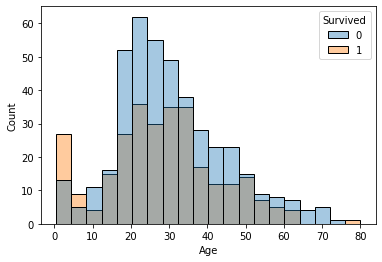

In [26]:
# Basic histplot
sns.histplot(data=df, x='Age', hue='Survived', alpha=0.4);

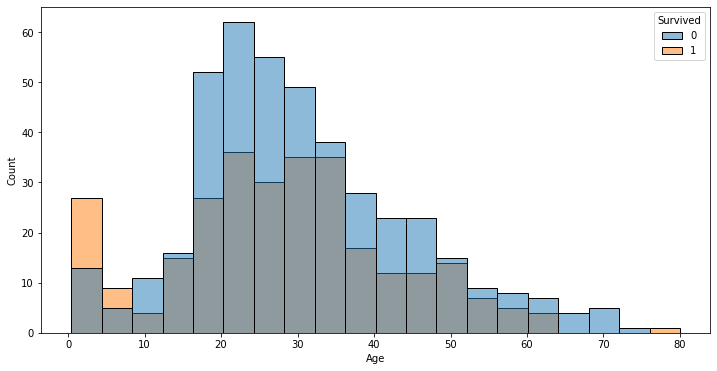

In [27]:
# Specify size using figsize
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived');

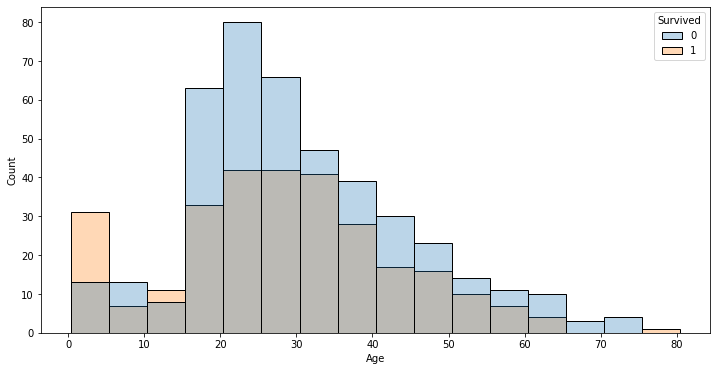

In [28]:
# Specify binwidth and reduce opacity
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived', binwidth=5, alpha=0.3);

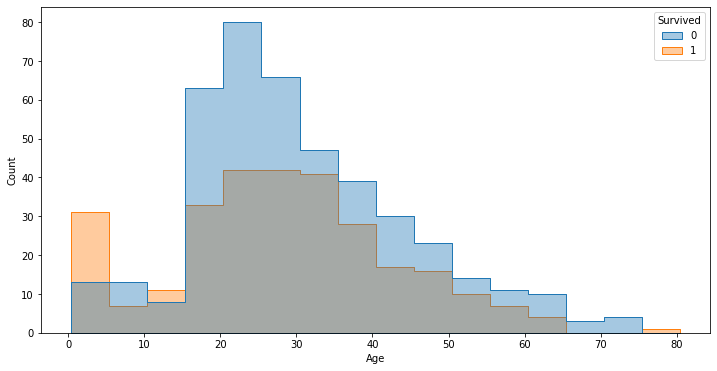

In [29]:
# Remove rectangle borders using element='step'
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived', binwidth=5, element='step', alpha=0.4);

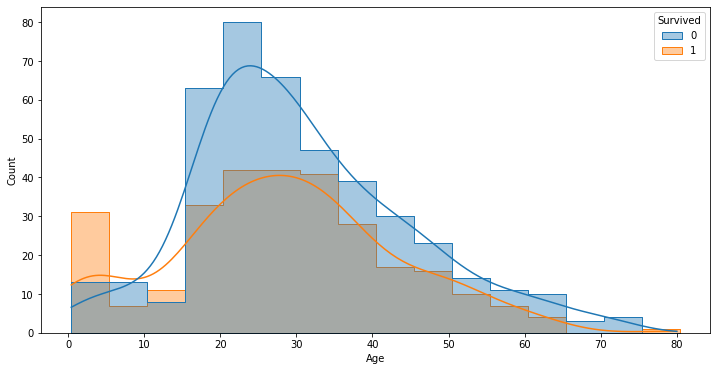

In [30]:
# Add kde curves
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived', binwidth=5, element='step', alpha=0.4, kde=True);

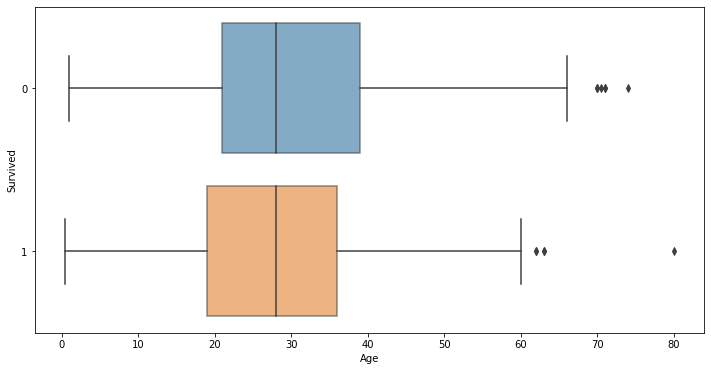

In [31]:
# Box plot
# To set alpha transparency use boxprops param https://github.com/mwaskom/seaborn/issues/979
fig = plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x='Age', y='Survived', orient='h', boxprops=dict(alpha=0.6));

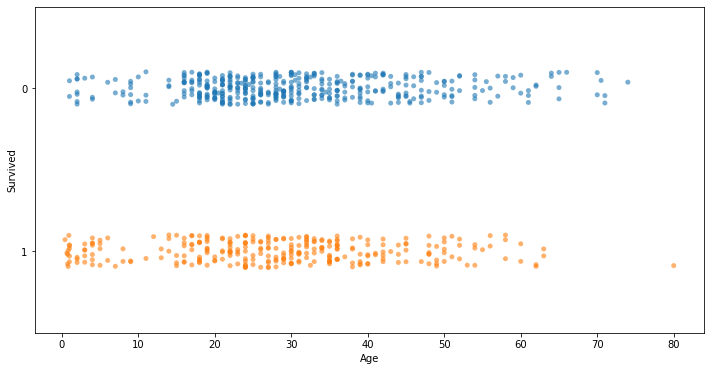

In [32]:
# Stripplot
fig = plt.subplots(figsize=(12,6))
sns.stripplot(data=df, x='Age', y='Survived', orient='h', alpha=0.6);

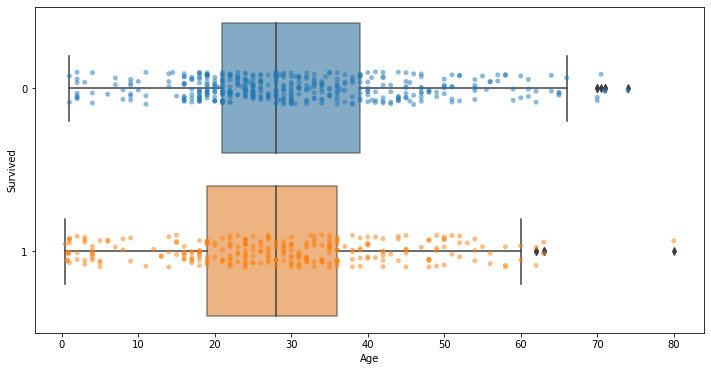

In [33]:
# Boxplot and stripplot overlaid
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
fig = plt.subplots(figsize=(12,6))
ax = sns.boxplot(data=df, x='Age', y='Survived', orient='h', boxprops=dict(alpha=0.6));
ax = sns.stripplot(data=df, x='Age', y='Survived', orient='h', alpha=0.5);

## Survivors by Siblings & Spouses (SibSp)

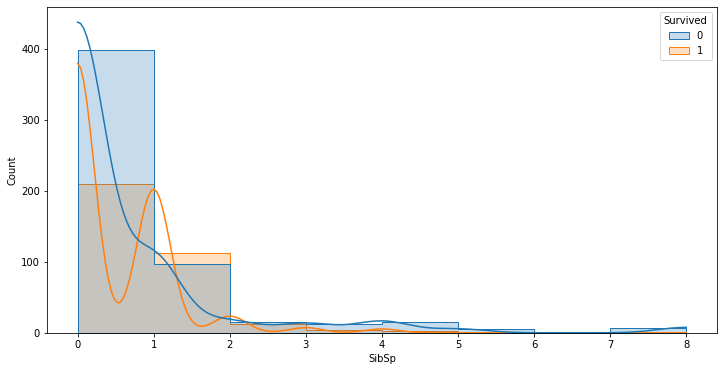

In [34]:
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='SibSp', hue='Survived', binwidth=1, element='step', kde=True);

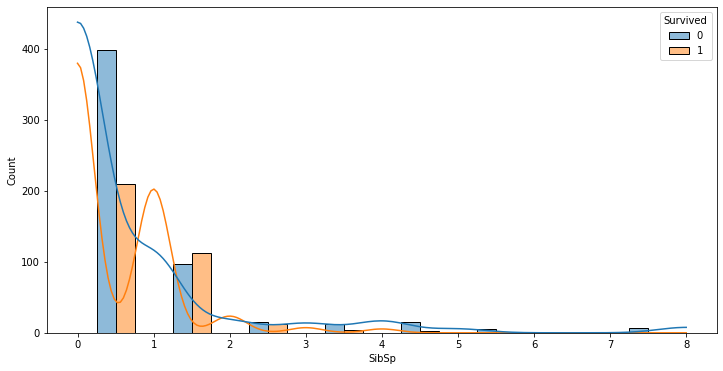

In [35]:
# Display bars side-by-side with multiple="dodge" and shrink
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='SibSp', binwidth=1, hue='Survived', multiple='dodge', kde=True, shrink=0.5);

## Survivors by # of Parents & Children (Parch)

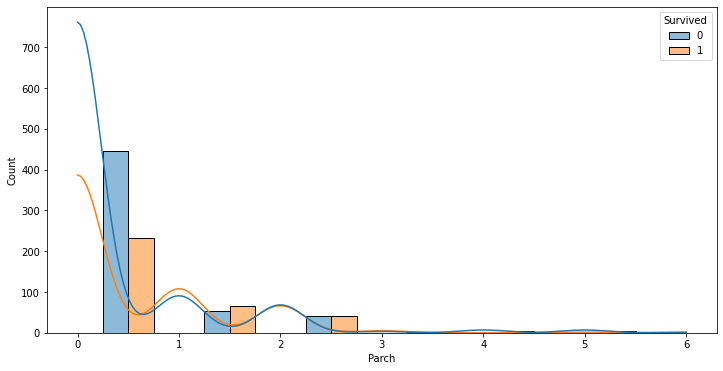

In [36]:
# Display bars side-by-side with multiple="dodge" and shrink
fig = plt.subplots(figsisze=(12,6))
sns.histplot(data=df, x='Parch', binwidth=1, hue='Survived', multiple='dodge', kde=True, shrink=0.5);

## Survivors by Fare

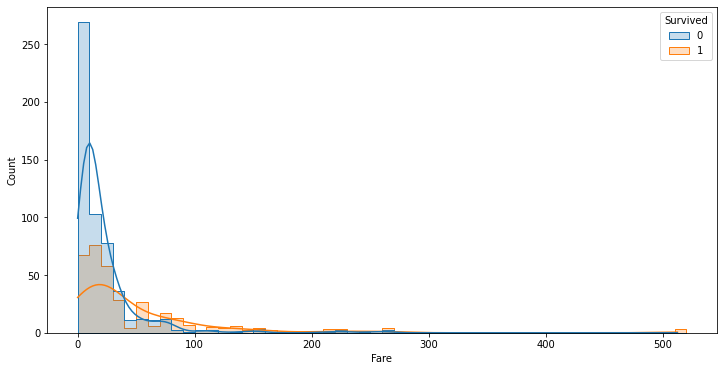

In [37]:
fig = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='Fare', hue='Survived', binwidth=10, element='step', kde=True);

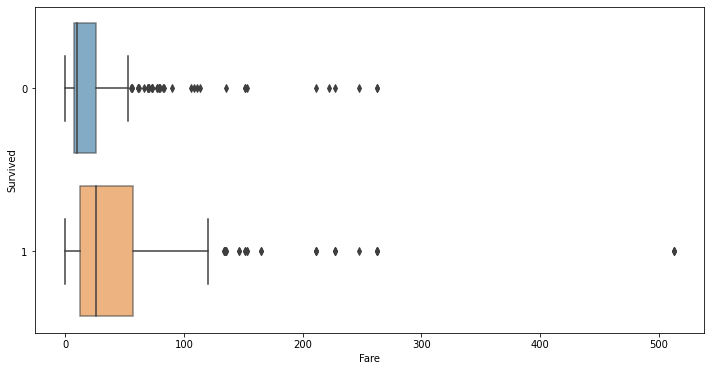

In [38]:
fig = plt.subplots(figsize=(12,6))
sns.boxplot(data=df, x='Fare', y='Survived', orient='h', boxprops=dict(alpha=.6));

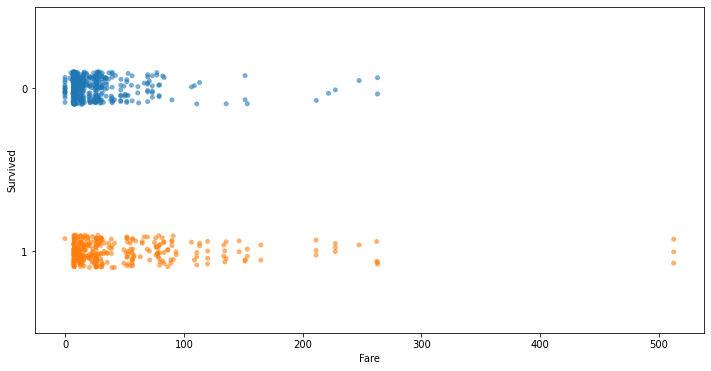

In [39]:
fig = plt.subplots(figsize=(12,6))
sns.stripplot(data=df, x='Fare', y='Survived', orient='h', alpha=0.6);

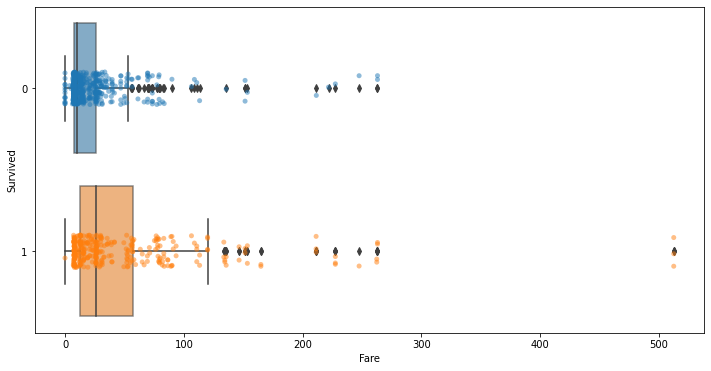

In [40]:
# Boxplot and stripplot overlaid
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
fig = plt.subplots(figsize=(12,6))
ax = sns.boxplot(data=df, x='Fare', y='Survived', orient='h', boxprops=dict(alpha=0.6));
ax = sns.stripplot(data=df, x='Fare', y='Survived', orient='h', alpha=0.5);

# Explore Categorical Features
- Pclass
- Sex
- Embarked
- Cabin_ind

## Survivors by Passenger Class (Pclass)

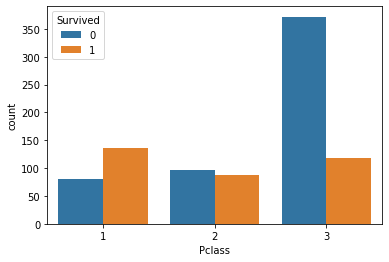

In [41]:
# Basic Seaborn countplot
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
sns.countplot(data=df, x='Pclass', hue='Survived');

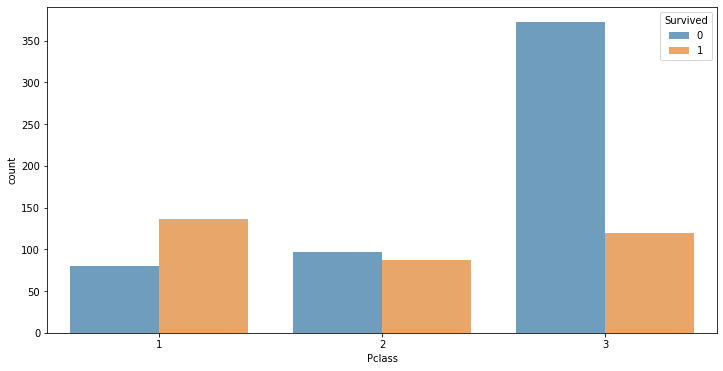

In [42]:
# Adjust figure size and color transparency
fig = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='Pclass', hue='Survived', alpha=0.7);

## Survivors by Sex

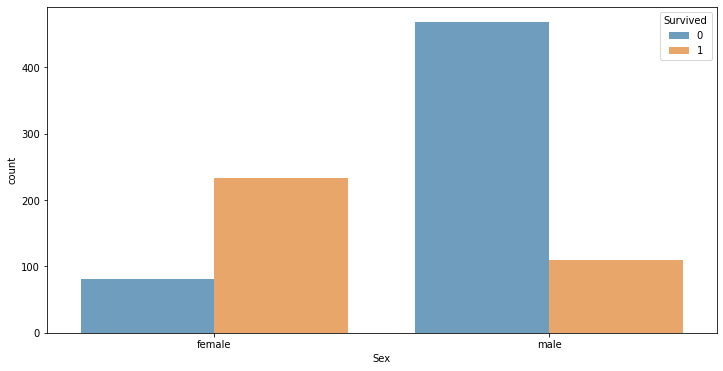

In [43]:
fig = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='Sex', hue='Survived', alpha=0.7);

## Survivors by Embarked

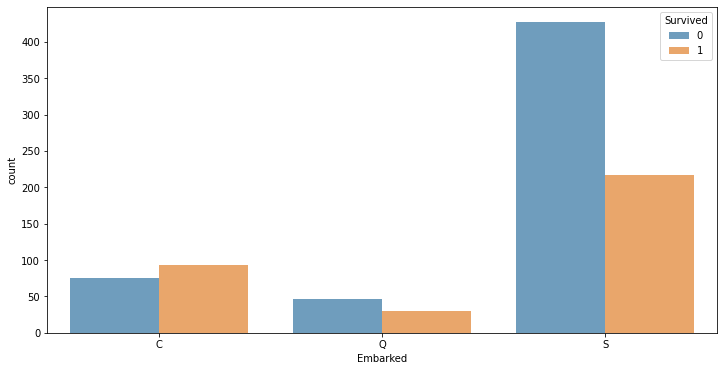

In [44]:
fig = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='Embarked', hue='Survived', alpha=0.7);

### Explore embarked: Surely embarking from 'S' must not be a _cause_ of higher fatalities?

In [45]:
df.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441

In [46]:
df.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked    C   Q    S
Cabin_ind             
0          99  73  515
1          69   4  129

In [47]:
df.pivot_table('Survived', index='Pclass', columns='Embarked', aggfunc='count')

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353

**Noteworthy:** 
- Southampton ('S') had twice as many men board there as women. More women survived than men.
- Southampton also had many embarkees with no cabin. Those without cabins were much more likely to die.
- Similarly, Southampton had a vast majority of embarkees travel 2nd or 3rd class. These also had lower survival rates.

**Decision:** Embarked has very strong correlation with other more significant variables. We should consider removing it from our data before building machine learning models.

## Survivors by Cabin_ind

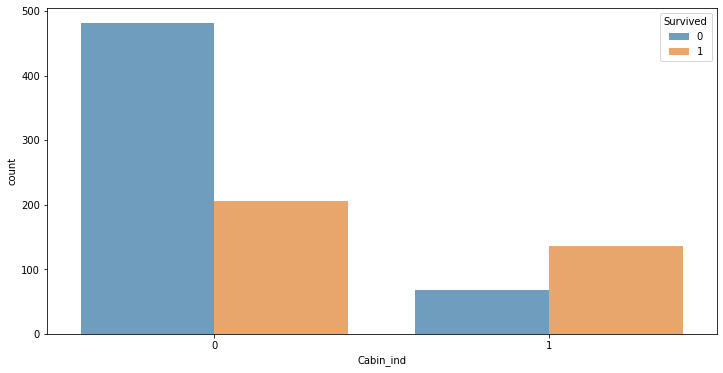

In [48]:
fig = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='Cabin_ind', hue='Survived', alpha=0.7);

# Final Cleanup Steps

## convert `Sex` to numeric
- male = 0, female = 1

In [49]:
gender_num = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_num)
df.head(10)

PassengerId Survived Pclass Sex  ...  Parch     Fare  Embarked  Cabin_ind
0            1        0      3   0  ...      0   7.2500         S          0
1            2        1      1   1  ...      0  71.2833         C          1
2            3        1      3   1  ...      0   7.9250         S          0
3            4        1      1   1  ...      0  53.1000         S          1
4            5        0      3   0  ...      0   8.0500         S          0
5            6        0      3   0  ...      0   8.4583         Q          0
6            7        0      1   0  ...      0  51.8625         S          1
7            8        0      3   0  ...      1  21.0750         S          0
8            9        1      3   1  ...      2  11.1333         S          0
9           10        1      2   1  ...      0  30.0708         C          0

[10 rows x 10 columns]

## Drop `Embarked`

In [50]:
df.drop(axis=1, columns='Embarked', inplace=True)
df.head()

PassengerId Survived Pclass Sex   Age  SibSp  Parch     Fare Cabin_ind
0            1        0      3   0  22.0      1      0   7.2500         0
1            2        1      1   1  38.0      1      0  71.2833         1
2            3        1      3   1  26.0      0      0   7.9250         0
3            4        1      1   1  35.0      1      0  53.1000         1
4            5        0      3   0  35.0      0      0   8.0500         0

# Export to File

In [51]:
timestamp = datetime.today().strftime('%Y%m%d-%H%M%S')
df.to_csv(f'/content/drive/MyDrive/Predictive Analytics/Titanic Project/output/titanic_cleaned_{timestamp}.csv')

In [52]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Predictive Analytics/Titanic Project/output'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Predictive Analytics/Titanic Project/output/titanic_cleaned.csv
/content/drive/MyDrive/Predictive Analytics/Titanic Project/output/titanic_cleaned_20210512-191145.csv
/content/drive/MyDrive/Predictive Analytics/Titanic Project/output/titanic_cleaned_20210513-033514.csv
/content/drive/MyDrive/Predictive Analytics/Titanic Project/output/titanic_cleaned_20210513-034024.csv
